In [20]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/my_gm.csv")

In [3]:
def new_ols(df):
    matrix = df['gdpPercap']
    model_matrix = sm.add_constant(matrix)
    y = df['lifeExp']
    model = sm.OLS(y, model_matrix)
    results = model.fit()
    return results
    
new_ols(df)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
def new_intercept(df):
    matrix = df['gdpPercap']
    model_matrix = sm.add_constant(matrix)
    y = df['lifeExp']
    model = sm.OLS(y, model_matrix)
    results = model.fit()
    return results
    
out = new_intercept(df)
pd.DataFrame({'slope': out.params})



/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,slope
const,53.955561
gdpPercap,0.000765


In [5]:
country_groups = df.groupby(['country'])

country_reg = country_groups[['gdpPercap']].agg(new_ols)
country_reg
country_reg['b0_intercept'] = [x.params[0] for x in country_reg.gdpPercap]
country_reg['b1_gdpPercap'] = [x.params[1] for x in country_reg.gdpPercap]
country_reg['b1_p'] = [x.pvalues[1] for x in country_reg.gdpPercap]
country_reg['adj_rsq'] = [x.rsquared for x in country_reg.gdpPercap]

country_reg.sort_values('adj_rsq',ascending=True).head(30)


,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
Botswana,<statsmodels.regression.linear_model.Regressio...,54.557534,0.000008,0.986227,0.000031
Mozambique,<statsmodels.regression.linear_model.Regressio...,40.144000,0.000434,0.970059,0.000148
Togo,<statsmodels.regression.linear_model.Regressio...,50.856992,0.000556,0.946991,0.000465
Afghanistan,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
Ghana,<statsmodels.regression.linear_model.Regressio...,49.887921,0.002348,0.856537,0.003430
Lesotho,<statsmodels.regression.linear_model.Regressio...,48.741192,0.001622,0.731632,0.012287
Rwanda,<statsmodels.regression.linear_model.Regressio...,37.490506,0.005907,0.679841,0.017742
Libya,<statsmodels.regression.linear_model.Regressio...,55.985062,0.000276,0.623543,0.025004
Sierra Leone,<statsmodels.regression.linear_model.Regressio...,39.673322,-0.002707,0.551617,0.036566


In [39]:
corr_coef = np.corrcoef(country_reg.b1_gdpPercap, country_reg.b0_intercept)[1,0]
corr_coef

-0.7559629406382983

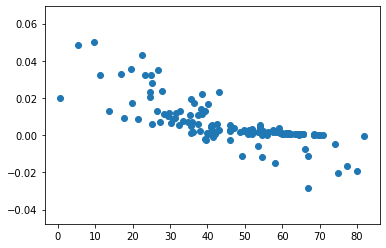

In [42]:
plt.scatter(country_reg.b0_intercept, country_reg.b1_gdpPercap)
plt.show()

In [45]:
country_reg.sort_values('b0_intercept', ascending=False).head(20)


,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
Kuwait,<statsmodels.regression.linear_model.Regressio...,81.973974,-0.000200,1.660645e-04,0.772666
Senegal,<statsmodels.regression.linear_model.Regressio...,79.904752,-0.019098,4.916830e-01,0.048479
Haiti,<statsmodels.regression.linear_model.Regressio...,77.378716,-0.016791,3.111034e-02,0.385803
Madagascar,<statsmodels.regression.linear_model.Regressio...,74.841978,-0.020269,7.159438e-04,0.697961
Nicaragua,<statsmodels.regression.linear_model.Regressio...,74.257411,-0.004645,1.118129e-01,0.233159
Norway,<statsmodels.regression.linear_model.Regressio...,71.050415,0.000179,2.329244e-10,0.984345
Iceland,<statsmodels.regression.linear_model.Regressio...,70.014934,0.000316,2.479351e-08,0.960264
Netherlands,<statsmodels.regression.linear_model.Regressio...,69.689054,0.000274,1.115054e-08,0.966116
Denmark,<statsmodels.regression.linear_model.Regressio...,68.651654,0.000264,2.764325e-09,0.974346


In [46]:
country_reg

,gdpPercap,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
country,,,,,
Afghanistan,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
Albania,<statsmodels.regression.linear_model.Regressio...,53.981907,0.004439,0.000682,0.700763
Algeria,<statsmodels.regression.linear_model.Regressio...,27.440225,0.007137,0.000053,0.818068
Angola,<statsmodels.regression.linear_model.Regressio...,41.614373,-0.001034,0.341620,0.090649
Argentina,<statsmodels.regression.linear_model.Regressio...,52.320078,0.001869,0.000797,0.691638
...,...,...,...,...,...
Vietnam,<statsmodels.regression.linear_model.Regressio...,40.221470,0.016958,0.002205,0.625013
West Bank and Gaza,<statsmodels.regression.linear_model.Regressio...,41.070333,0.005122,0.001807,0.639045
"Yemen, Rep.",<statsmodels.regression.linear_model.Regressio...,19.694607,0.017260,0.000001,0.912747


In [58]:
my_gm = df
my_gm

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [90]:
country_reg = country_reg.rename(columns={'gdpPercap':'model_object'})
master = pd.merge(my_gm, country_reg, on='country')
master

,country,continent,year,lifeExp,pop,gdpPercap,model_object,b0_intercept,b1_gdpPercap,b1_p,adj_rsq
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,<statsmodels.regression.linear_model.Regressio...,39.277201,-0.002240,0.883342,0.002261
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,<statsmodels.regression.linear_model.Regressio...,38.580853,0.022147,0.175545,0.175291


In [138]:
def studentize(x):
    centered = (x-np.mean(x))
    studentized = centered / np.std(x)
    return studentized


cols_of_interest = master[master.columns[3:10]]
cols_of_interest = cols_of_interest.drop('model_object', axis=1)
cols_of_interest

list(map(studentize, cols_of_interest))

TypeError: cannot perform reduce with flexible type

In [134]:
[type(df[x]) for x in df]


[pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series]

In [127]:
def col_number(df):
    names = list(df.columns)
    type = [x.type() for x in df.columns]
    return pd.DataFrame({'column_name':names})
    
col_number(master)

,column_name
0,country
1,continent
2,year
3,lifeExp
4,pop
5,gdpPercap
6,model_object
7,b0_intercept
8,b1_gdpPercap
9,b1_p
